<a href="https://colab.research.google.com/github/Neharaaj/Airfoil-project/blob/main/airfoilproject_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
data4=pd.read_csv("/content/airfoil.csv")

In [49]:
data4

,Frequency,Angle of Attack,Chord length,FSM,SSDT,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [50]:
data4.shape

(1503, 6)

In [51]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Frequency         1503 non-null   int64  
 1   Angle of Attack   1503 non-null   float64
 2   Chord length      1503 non-null   float64
 3   FSM               1503 non-null   float64
 4   SSDT              1503 non-null   float64
 5   SSPL              1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [52]:
data4.isnull()

,Frequency,Angle of Attack,Chord length,FSM,SSDT,SSPL
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1498,False,False,False,False,False,False
1499,False,False,False,False,False,False
1500,False,False,False,False,False,False
1501,False,False,False,False,False,False


In [53]:


#EDA

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

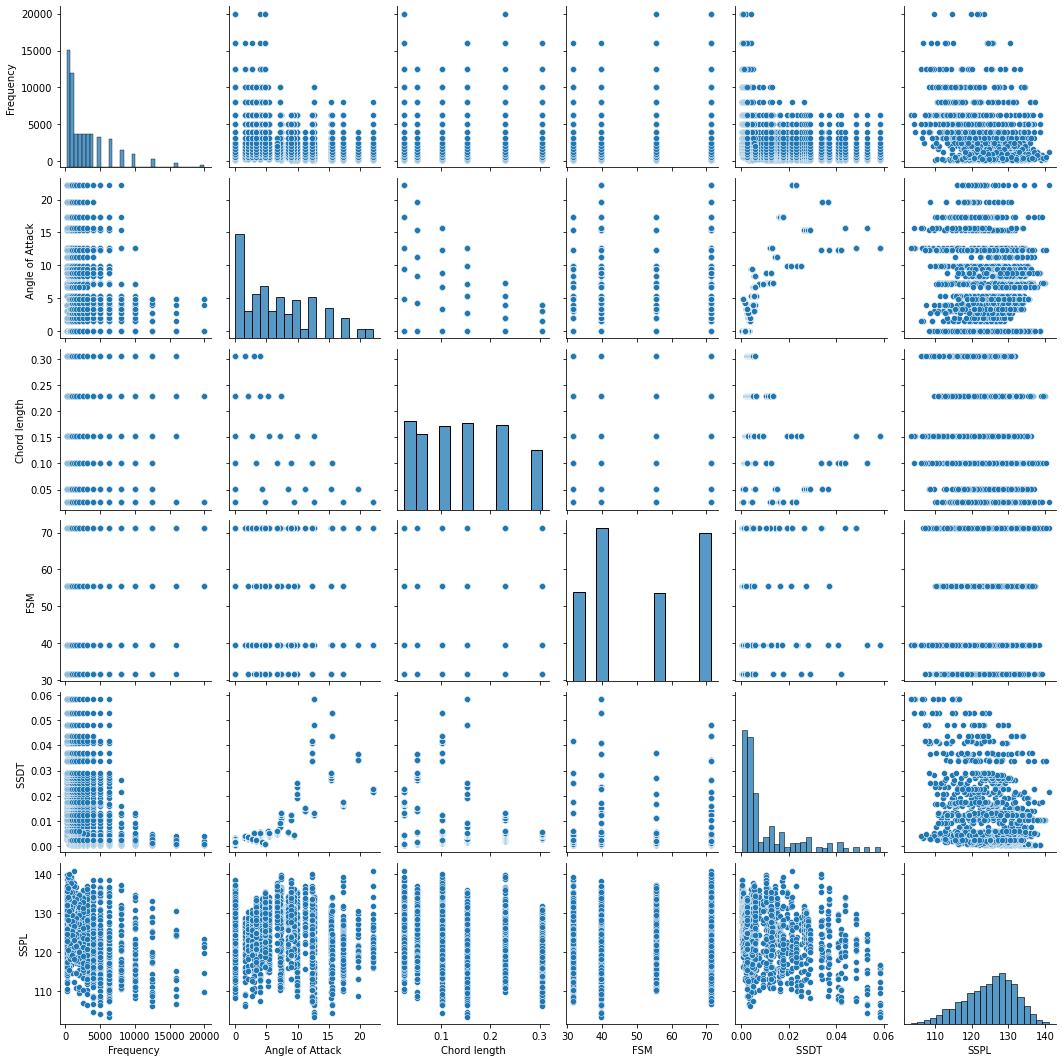

In [55]:
sns.pairplot(data4)

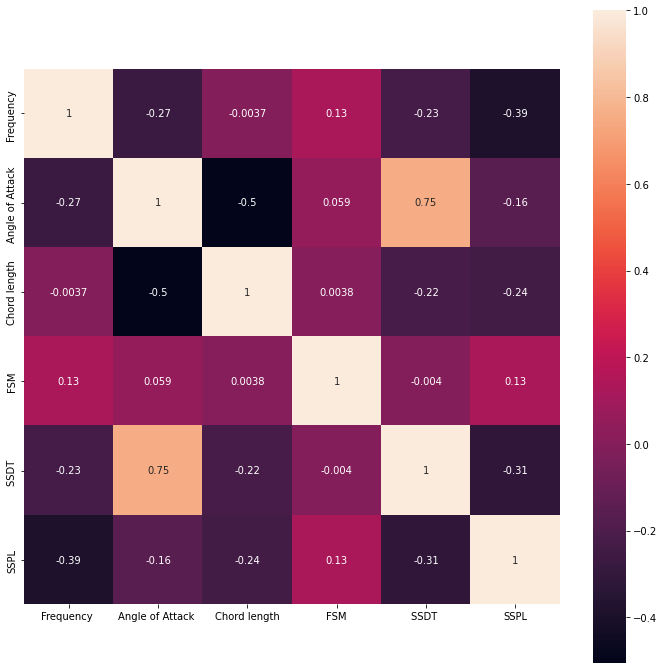

In [56]:
corr =data4.select_dtypes(include =['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square= True,annot=True)


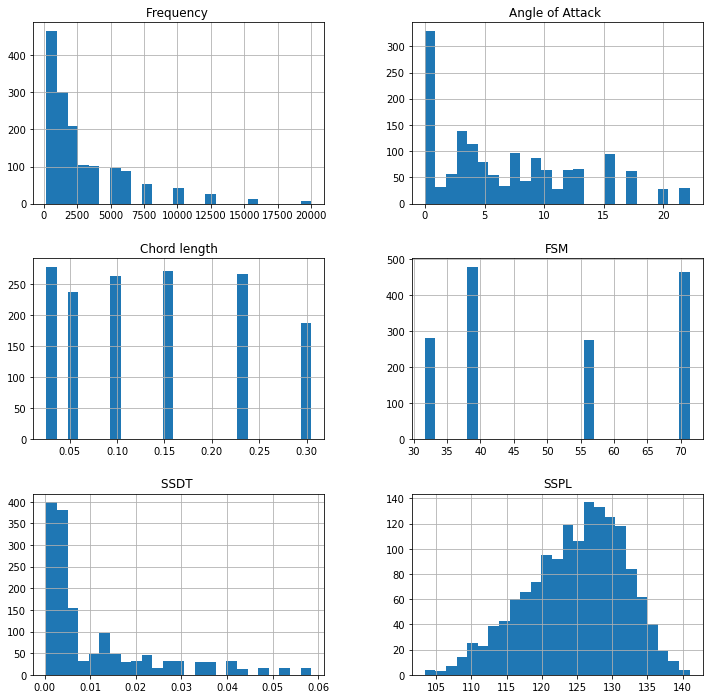

In [59]:
data4.hist(bins=25,figsize=(12,12));

In [60]:
y=data4['SSPL']
x=data4.drop(['SSPL'],axis=1)

In [174]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [175]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(x_train,y_train)

In [176]:
y_pred=model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("For Testing Dataset")
print("Mean absolute error:",mae)
print("R2 score;",r2)



For Testing Dataset
Mean absolute error: 3.545248297264667
R2 score; 0.5585557273101007


In [177]:
model.intercept_

132.84565721248177

In [178]:
model.coef_

array([-1.28041334e-03, -4.10769342e-01, -3.60326340e+01,  9.81537999e-02,
       -1.44109711e+02])

In [179]:
model.score(x_test,y_test)

0.5585557273101007

In [180]:
AdjustedRsquare = print(1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

0.5137911040309058


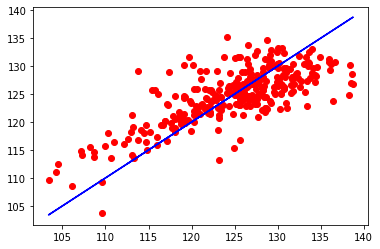

In [181]:

plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_test,c='blue')
plt.show()

In [182]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
regr = regr.fit(x_train,y_train)

In [183]:

y_pred=regr.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("For Testing Dataset")
print("Mean absolute error:",mae)
print("Root mean square error:",rmse)
print("r2 score :",r2)


For Testing Dataset
Mean absolute error: 1.636388704318937
Root mean square error: 2.2654245170662652
r2 score : 0.8908959126091601


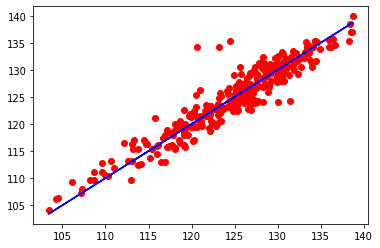

In [184]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_test,c='blue')
plt.show()

In [185]:

from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=3,random_state=0,n_estimators=100)
regr=regr.fit(x_train,y_train)

In [186]:

y_pred=regr.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
mse=mean_absolute_error(y_test,y_pred)
print("For testing dataset")
print("mean absolute error:",mse)
print("Root mean square:",rmse)
print("r2_score:",r2)

For testing dataset
mean absolute error: 3.580102419028613
Root mean square: 4.549451875786834
r2_score: 0.5599926012095408


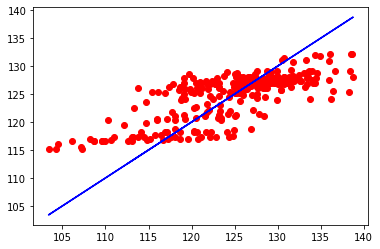

In [187]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_test,c='blue')
plt.show()